In [1]:
from sklearn.linear_model import LinearRegression
from jupyterthemes import jtplot
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
jtplot.style()

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_FileGDB.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_FileGDB.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_MSSQLSpatial.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_MSSQLSpatial.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_OCI.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_OCI.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_PG.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Files\GeoDa Software\ogr_PG.dll
126: The specified module could not be found.

Can't load requested DLL: C:\Program Fil

In [2]:
sftax = pd.read_csv('C:/Users/Rohan/Documents/NYU/PUI/Assessor_Historical_Secured_Property_Tax_Rolls.csv',\
                usecols=['Closed Roll Year', 'Property Location', 'Parcel Number', 'Block',
       'Lot', 'Year Property Built', 'Number of Bathrooms', 'Number of Bedrooms',
       'Number of Rooms', 'Number of Stories', 'Number of Units',
       'Zoning Code', 'Construction Type', 'Lot Depth', 'Lot Frontage',
       'Property Area', 'Basement Area', 'Lot Area',
       'Tax Rate Area Code', 'Percent of Ownership', 'Homeowner Exemption Value', 'Current Sales Date',
       'Assessed Fixtures Value', 'Assessed Improvement Value',
       'Assessed Land Value', 'Assessed Personal Property Value',
       'the_geom', 'Row ID']); sftax.head()

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Year Property Built,Number of Bathrooms,Number of Bedrooms,Number of Rooms,Number of Stories,...,Tax Rate Area Code,Percent of Ownership,Homeowner Exemption Value,Current Sales Date,Assessed Fixtures Value,Assessed Improvement Value,Assessed Land Value,Assessed Personal Property Value,the_geom,Row ID
0,2012,0000 0000 0000,9999065,9999,065,NaN,0.0,0,0.0,0.0,...,1.0,1.0,0.0,2012/01/01,0,0,0,2351,NaN,20129999065
1,2013,0000 0000 0000,9999189,9999,189,NaN,0.0,0,0.0,0.0,...,1.0,1.0,0.0,2013/01/01,0,0,0,1505,NaN,20139999189
2,2007,0000 0000 0000,9999129,9999,129,NaN,0.0,0,0.0,0.0,...,511.0,1.0,0.0,2008/01/01,0,0,0,0,NaN,20079999129
3,2014,0000 0000 0000,9999178,9999,178,NaN,0.0,0,0.0,0.0,...,1.0,1.0,0.0,2014/01/01,0,0,0,27976,NaN,20149999178
4,2008,0000 0000 0000,9999132,9999,132,NaN,0.0,0,0.0,0.0,...,1014.0,1.0,0.0,2008/01/01,0,0,0,0,NaN,20089999132


In [3]:
sftax.columns

Index(['Closed Roll Year', 'Property Location', 'Parcel Number', 'Block',
       'Lot', 'Year Property Built', 'Number of Bathrooms',
       'Number of Bedrooms', 'Number of Rooms', 'Number of Stories',
       'Number of Units', 'Zoning Code', 'Construction Type', 'Lot Depth',
       'Lot Frontage', 'Property Area', 'Basement Area', 'Lot Area',
       'Tax Rate Area Code', 'Percent of Ownership',
       'Homeowner Exemption Value', 'Current Sales Date',
       'Assessed Fixtures Value', 'Assessed Improvement Value',
       'Assessed Land Value', 'Assessed Personal Property Value', 'the_geom',
       'Row ID'],
      dtype='object')

In [4]:
sftax.isna().sum().sort_values(ascending=False)

Current Sales Date                  1128959
Construction Type                    462245
Zoning Code                          400029
Year Property Built                  208669
Tax Rate Area Code                     6948
Assessor Neighborhood                  3661
Assessor Neighborhood District         3661
Analysis Neighborhood                  2126
Supervisor District                    2126
the_geom                               2126
Use Code                                934
Use Definition                          934
Property Class Code Definition          934
Property Class Code                     858
Assessor Neighborhood Code              679
Homeowner Exemption Value                61
Basement Area                            28
Number of Rooms                          11
Number of Stories                        11
Lot                                       1
Percent of Ownership                      1
Assessed Personal Property Value          0
Assessed Land Value             

<AxesSubplot:>

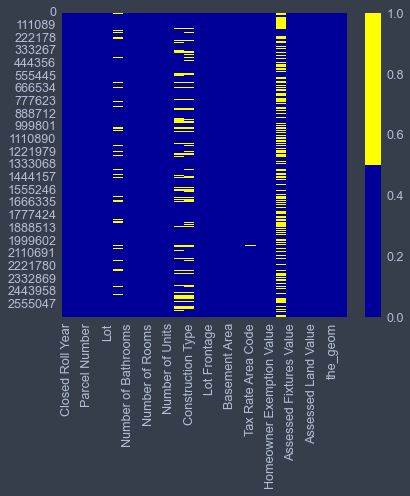

In [6]:
sns.heatmap(sftax.isna(), cmap = sns.color_palette(['#000099','#ffff00']))

In [19]:
print(sftax.shape)
print(sftax.dtypes)

(2666117, 39)
Closed Roll Year                      int64
Property Location                    object
Parcel Number                        object
Block                                object
Lot                                  object
Volume Number                         int64
Use Code                             object
Use Definition                       object
Property Class Code                  object
Property Class Code Definition       object
Year Property Built                 float64
Number of Bathrooms                 float64
Number of Bedrooms                    int64
Number of Rooms                     float64
Number of Stories                   float64
Number of Units                       int64
Zoning Code                          object
Construction Type                    object
Lot Depth                           float64
Lot Frontage                        float64
Property Area                         int64
Basement Area                       float64
Lot Area          

In [8]:
sftax_num = sftax.select_dtypes(include = [np.number])
sftax_num_cols = sftax_num.columns.values
print(sftax_num_cols)

['Closed Roll Year' 'Volume Number' 'Year Property Built'
 'Number of Bathrooms' 'Number of Bedrooms' 'Number of Rooms'
 'Number of Stories' 'Number of Units' 'Lot Depth' 'Lot Frontage'
 'Property Area' 'Basement Area' 'Lot Area' 'Tax Rate Area Code'
 'Percent of Ownership' 'Misc Exemption Value' 'Homeowner Exemption Value'
 'Assessed Fixtures Value' 'Assessed Improvement Value'
 'Assessed Land Value' 'Assessed Personal Property Value'
 'Assessor Neighborhood District' 'Supervisor District']


In [9]:
sftax_nonnum = sftax.select_dtypes(exclude = [np.number])
sftax_nonnum_cols = sftax_nonnum.columns.values
print(sftax_nonnum_cols)

['Property Location' 'Parcel Number' 'Block' 'Lot' 'Use Code'
 'Use Definition' 'Property Class Code' 'Property Class Code Definition'
 'Zoning Code' 'Construction Type' 'Current Sales Date'
 'Assessor Neighborhood Code' 'Assessor Neighborhood'
 'Analysis Neighborhood' 'the_geom' 'Row ID']


In [ ]:
sftax_regressors = sftax.loc[]